### 라이브러리 정의

In [1]:
# 데이터 처리 라이브러리
import pandas as pd
import numpy as np
# 분석알고리즘 DecisionTree 구현 라이브러리
from sklearn.tree import DecisionTreeRegressor 
# 과거데이터를 8:2, 7:3 이나 이런식으로 자동으로 나누어주는 라이브러리
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### 데이터 불러오기

In [4]:
featuresData = \
    pd.read_csv("../dataset/feature_regression_example.csv")
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442


### 1. 데이터 전처리

### 1-1. 타입 통합 / 특성 숫자컬럼 추가

### 1-1-1. 데이터 타입 통합

In [5]:
# featuresData.info()

In [6]:
# 주의할 사항은 모든 컬럼에 대해서 고정시키는걸 고려햐는게 나을수도 있다
featuresData.QTY = featuresData.QTY.astype(float)

### 1-1-2. 특성 값 숫자컬럼 변경

In [7]:
featuresData["HOLIDAY_NEW"] = \
    np.where(featuresData.HOLIDAY=="Y",1,0)

In [8]:
featuresData["PROMOTION_NEW"] = \
    np.where(featuresData.PROMOTION=="Y",1,0)

### 1-2. 특성 선정 / 데이터 분리

### 1-2-1. 특성 선정

In [9]:
corrDf = featuresData.corr()

In [10]:
standardLimit = 0.5

In [11]:
features = \
    list(corrDf.loc[ ( abs(corrDf.QTY) > standardLimit ) & 
                    (corrDf.QTY != 1) ].index )

In [12]:
label = ["QTY"]

### 1-2-2. 데이터 분리

In [13]:
standardIndex = 0.8

In [14]:
sortKey = ["REGIONID","ITEM","YEARWEEK"]

In [15]:
sortedData = featuresData.sort_values(sortKey, ignore_index=True)

In [16]:
selectedIndex = int( list( sortedData.shape )[0] * standardIndex )

In [17]:
yearweekStd = sortedData.loc[selectedIndex].YEARWEEK

In [18]:
# 훈련데이터와 테스트데이터를 (문제지와 정답지로 구분해서 정의한다.)
trainingDataFeatures = \
    sortedData.loc[sortedData.YEARWEEK <= yearweekStd, features]
trainingDataLabel = \
    sortedData.loc[sortedData.YEARWEEK <= yearweekStd, label]
testDataFeatures = \
    sortedData.loc[sortedData.YEARWEEK > yearweekStd, features]
testDataLabel = \
    sortedData.loc[sortedData.YEARWEEK > yearweekStd, label]

### 2. 모델적용

### 2-1. 모델 적용

### 2-1-1 학습

In [19]:
# 모델 선언 (Decision, Random)
model_dt = DecisionTreeRegressor(random_state=10, max_depth=1)
model_rf = RandomForestRegressor(random_state=10)
model_lr = LinearRegression()

In [20]:
model_dt.fit(X=trainingDataFeatures, y=trainingDataLabel)
model_rf.fit(X=trainingDataFeatures, y=trainingDataLabel)
model_lr.fit(X=trainingDataFeatures, y=trainingDataLabel)

<ipython-input-20-54507afbb5c1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X=trainingDataFeatures, y=trainingDataLabel)


LinearRegression()

### 3. 예측

In [21]:
predictValueDt = model_dt.predict(testDataFeatures)
predictValueRf = model_rf.predict(testDataFeatures)
predictValueLr = model_lr.predict(testDataFeatures)

In [22]:
testDataAll = \
    featuresData.loc[ testDataFeatures.index ] 

In [23]:
testDataAll["PREDICT_DT"] = predictValueDt
testDataAll["PREDICT_RF"] = predictValueRf

In [24]:
testDataAll["PREDICT_LR"] = predictValueLr

In [25]:
predictDtMae = mean_absolute_error(y_true=testDataAll.QTY,
                    y_pred=testDataAll.PREDICT_DT )
predictRfMae = mean_absolute_error(y_true=testDataAll.QTY,
                    y_pred=testDataAll.PREDICT_RF )
predictLrMae = mean_absolute_error(y_true=testDataAll.QTY,
                    y_pred=testDataAll.PREDICT_LR )

In [26]:
errorReportDf = pd.DataFrame( [[ predictDtMae, predictRfMae,predictLrMae     ]],
            columns=["DT_MAE","RF_MAE","LR_MAE"])

In [27]:
errorReportDf

,DT_MAE,RF_MAE,LR_MAE
0,522.448884,398.759886,625.493983


In [28]:
features

['HCLUS', 'PRO_PERCENT', 'HOLIDAY_NEW', 'PROMOTION_NEW']

In [29]:
# 대휴일 1 소휴일 4
userInputHCLUS = 1
# 제품 할인 %
userInputProPercent=0.5
# 홀리데이 유무 Y= 1 N = 0
userInputHoilidayYn = 1
# 프로모션 유무 Y=1 N= 0
userInputPromotionYn = 1

In [30]:
futureData = pd.DataFrame([[ userInputHCLUS,
              userInputProPercent,
              userInputHoilidayYn,
              userInputPromotionYn]]   )

In [31]:
# pickle 파일로 저장가능하다.
model_dt.predict(futureData)

array([2062.85714286])

In [32]:
trainingDataFeatures.shape

(85, 4)

In [33]:
treeStep1 = trainingDataFeatures.loc[trainingDataFeatures.PRO_PERCENT > 0.259]

In [34]:
treeStep2 = treeStep1.loc[treeStep1.PRO_PERCENT > 0.294]

In [35]:
treeStep3 = treeStep2.loc[treeStep2.HCLUS > 0.5]

In [36]:
treeStep3.index

Int64Index([77, 78, 79, 80, 81], dtype='int64')

In [37]:
featuresData.loc[  treeStep3.index ]

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HOLIDAY_NEW,PROMOTION_NEW
77,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201625,2016,25,968.0,Y,1,Y,0.308584,1,1
78,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201626,2016,26,1685.0,Y,1,Y,0.308584,1,1
79,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201627,2016,27,1586.0,Y,1,Y,0.308584,1,1
80,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201628,2016,28,1616.0,Y,1,Y,0.308584,1,1
81,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201629,2016,29,1318.0,Y,1,Y,0.308584,1,1


In [38]:
trainingDataLabel.loc[treeStep3.index].QTY.mean()

1434.6

# graphviz 시각화

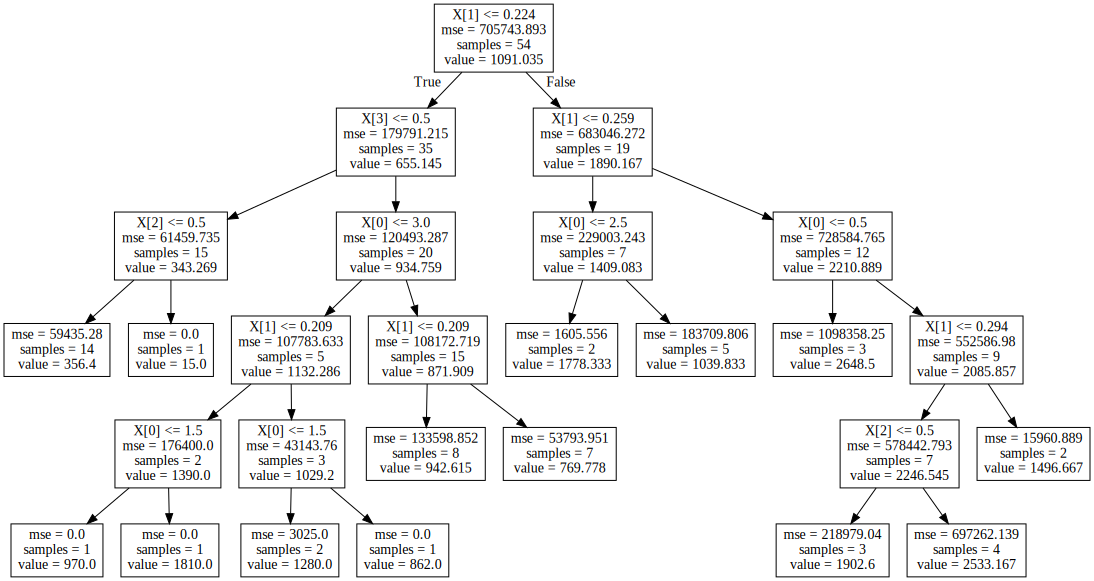

In [39]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(decision_tree=model_rf.estimators_[30],
                out_file="tree.dot",
                impurity=True)
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 모델 저장

In [40]:
import pickle

In [41]:
filename = 'finalized_model.sav'
pickle.dump(model_dt, open(filename, 'wb'))